In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('SBUX.csv')

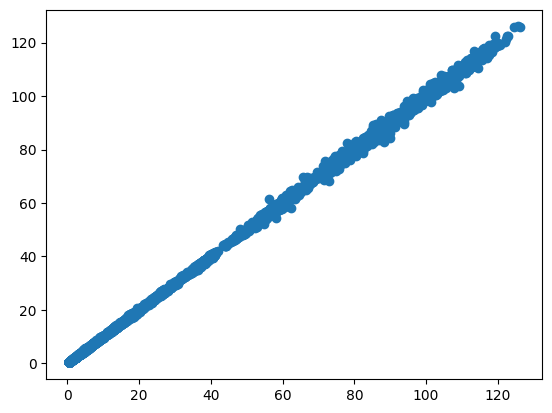

In [3]:
# My dataset

X = df['Open'].values
y = df['Close'].values

plt.figure()
plt.scatter(X,y)
plt.show()

In [4]:
# shuffle data 
index = np.arange(0,len(df))
np.random.shuffle(index)

In [5]:
#sperate data
train_percent = 0.8
y_train = y[:int(train_percent * len(y))]
x_train = X[:int(train_percent * len(X))]

y_test = y[int(train_percent * len(y)):]
x_test = X[int(train_percent * len(X)):]

In [16]:
#define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# input_dim = 1 จำนวนแถวของข้อมูล
model.add(Dense(1000,input_dim=(1)))
model.add(Dense(1))

In [17]:
model.compile(loss = 'mse', optimizer = 'adam')

In [18]:
# Prediction pre-train
pred_train = np.squeeze(model.predict(x_train))
pred_test = np.squeeze(model.predict(x_test))

print("MSE train : ", np.mean((pred_train -  y_train)**2))
print("MSE test : ", np.mean((pred_test -  y_test)**2))

50/50 [==============================] - 0s 2ms/step
MSE train :  477.075539867164
MSE test :  6995.032503187673


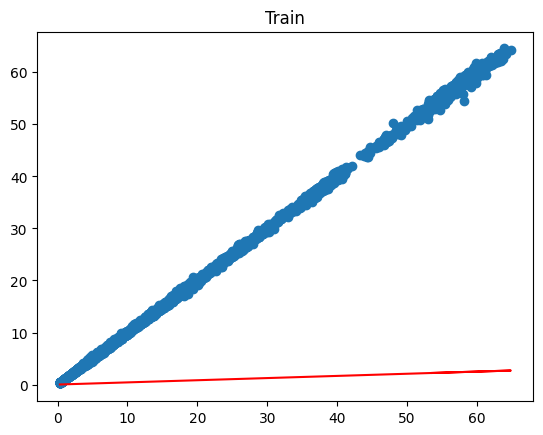

In [19]:
plt.figure()
plt.title('Train')
plt.scatter(x_train,y_train, label = 'act')
plt.plot(x_train, pred_train, label='predict', color='red')
plt.show()

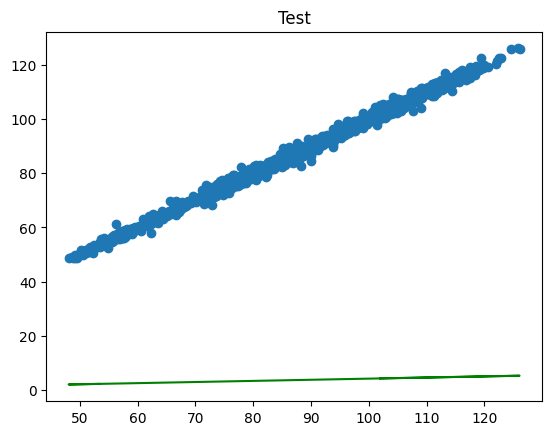

In [20]:
plt.figure()
plt.title('Test')
plt.scatter(x_test,y_test, label = 'act')
plt.plot(x_test, pred_test, label='predict', color='green')
plt.show()

In [21]:
#Training
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
198/198 [==============================] - 1s 2ms/step - loss: 11.3421
Epoch 2/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0762
Epoch 3/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 4/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 5/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0808
Epoch 6/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0792
Epoch 7/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0886
Epoch 8/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0824
Epoch 9/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 10/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0790
Epoch 11/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 12/50
198/198 [==============================] - 0s 2ms/step - loss: 0.0835
Epoch 13/50
198/198 [===

In [22]:
# Prediction pre-train
pred_train = np.squeeze(model.predict(x_train))
pred_test = np.squeeze(model.predict(x_test))

print("MSE train : ", np.mean((pred_train -  y_train)**2))
print("MSE test : ", np.mean((pred_test -  y_test)**2))

50/50 [==============================] - 0s 1ms/step
MSE train :  0.08071361983895299
MSE test :  1.408242178295109


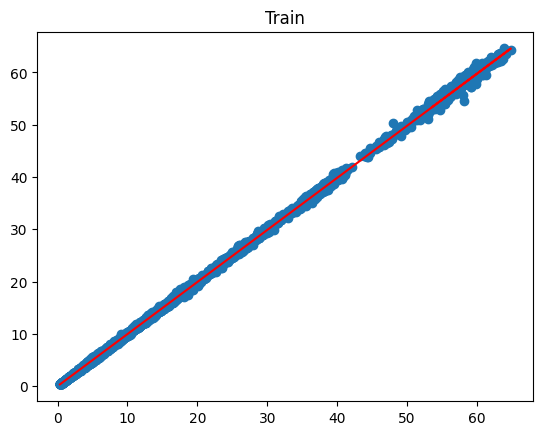

In [23]:
plt.figure()
plt.title('Train')
plt.scatter(x_train,y_train, label = 'act')
plt.plot(x_train, pred_train, label='predict', color='red')
plt.show()

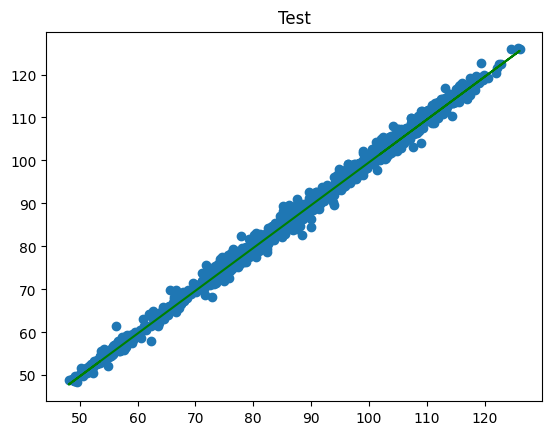

In [24]:
plt.figure()
plt.title('Test')
plt.scatter(x_test,y_test, label = 'act')
plt.plot(x_test, pred_test, label='predict', color='green')
plt.show()
print('hello')

In [25]:
import mlflow
from mlflow.models import infer_signature
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Define the model hyperparameters
params = {
    "normalize": True,  # You can adjust hyperparameters based on your needs
}

# # Train the model
# model = LinearRegression(**params)
# model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("mse", mse)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic Linear Regression model")

    # Infer the model signature
    signature = infer_signature(x_train, model.predict(x_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="linear_regression_model",
        signature=signature,
        input_example=x_train,
        registered_model_name="tracking-quickstart",
    )

198/198 [==============================] - 0s 2ms/step


Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
2023/12/19 16:08:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 6
Created version '6' of model 'tracking-quickstart'.


In [62]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

x_testTest = x_test.copy()
x_testTest[0] = 103.1

predictions = loaded_model.predict(x_testTest)

result = pd.DataFrame(x_testTest, columns=['Open'])
result["Close"] = y_test
result["predicted"] = predictions

result[:4]

50/50 [==============================] - 0s 2ms/step


,Open,Close,predicted
0,103.100000,53.150002,102.636467
1,53.259998,53.500000,53.030312
2,53.320000,53.040001,53.090027
3,52.919998,52.700001,52.691906
